# Complex Machine Learning Datasets

---

- Author: Quan Nguyen

---


# Dataset 1  and Machine Learning Model overview

- Data source: [Metabolic Syndrome](https://data.world/informatics-edu/metabolic-syndrome-prediction)  
- The dataset for analysis came from the NHANES initiative where the following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc. that might contribute to the model but we will not sure, until we test the model.
- The target of this dataset is to predict the diagnosis of metabolic syndrome.
- One row represents a patient's info 
- This is a classification problem

In [53]:
#pandas
import pandas as pd
#numpy
import numpy as np 
#matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
ms = pd.read_csv("D:\Lesson\Stack 3\Metabolic  Syndrome (1).csv")
ms.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [3]:
print(f"There is {ms.shape[0]} rows, and {ms.shape[1]} columns in the data")

There is 2401 rows, and 15 columns in the data


## Data Cleaning

### Delete Unneccesary Columns

In [4]:
ms['seqn'].nunique()

2401

this columns has all different values it might be the identifying number of a patient, so we will drop this column.

In [5]:
ms.drop(columns=['seqn'], inplace=True)

### Delete Duplicated Rows

In [6]:
print(f'The dataset has {ms.duplicated().sum()} duplicated values')

The dataset has 0 duplicated values


### Handling missing value

In [7]:
ms.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [8]:
print(f'the data set has {ms.isna().sum().sum()} missing values')

the data set has 436 missing values


In [9]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(5), object(4)
memory usage: 262.7+ KB


In [10]:
#convert columns names to lower case to make them easier to remember
ms.columns = ms.columns.str.lower()
ms.columns


Index(['age', 'sex', 'marital', 'income', 'race', 'waistcirc', 'bmi',
       'albuminuria', 'uralbcr', 'uricacid', 'bloodglucose', 'hdl',
       'triglycerides', 'metabolicsyndrome'],
      dtype='object')

***There is no missing values on our target***

> We will not handle missing value because when we split the data set and train the data we will use onehotencoder and simple imputer to handle these missing values

### Checking inconsistency of the values

In [11]:
ms.describe(include='number')

,age,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [12]:
ms.describe(include='object')

,sex,marital,race,metabolicsyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


In [13]:
ms['marital'].value_counts()

Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: marital, dtype: int64

In [14]:
ms['race'].value_counts()

White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: race, dtype: int64

***There is no inconsistencies value being detected***

### Identify Outliers

In [15]:
#function to identify outliers
def identify_outlier(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

In [16]:
identify_outlier(ms, 'bmi')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
18,38,Female,Single,8200.0,Black,120.3,45.4,0,16.63,5.6,102,36,162,MetSyn
77,71,Female,Widowed,1000.0,White,140.6,56.3,1,30.21,11.2,134,53,167,MetSyn
98,59,Male,Married,1700.0,Black,136.8,45.6,0,10.85,5.0,106,48,55,MetSyn
101,37,Female,Married,9000.0,White,147.3,48.2,0,15.49,6.5,100,53,57,MetSyn
118,29,Male,Single,2000.0,Asian,154.7,48.3,0,4.73,7.2,122,30,199,MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,26,Female,Single,2000.0,Asian,138.2,44.5,0,13.43,7.3,107,47,112,MetSyn
2231,36,Male,Married,2000.0,White,138.5,44.7,0,4.15,7.8,90,41,191,MetSyn
2288,35,Male,Married,2500.0,White,145.8,45.3,0,4.83,6.7,97,38,489,MetSyn
2365,50,Female,Single,1500.0,Black,142.6,48.0,1,59.70,6.5,276,42,298,MetSyn


In [17]:
identify_outlier(ms,'waistcirc')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
77,71,Female,Widowed,1000.0,White,140.6,56.3,1,30.21,11.2,134,53,167,MetSyn
101,37,Female,Married,9000.0,White,147.3,48.2,0,15.49,6.5,100,53,57,MetSyn
118,29,Male,Single,2000.0,Asian,154.7,48.3,0,4.73,7.2,122,30,199,MetSyn
169,40,Female,Married,9000.0,Black,163.5,68.7,0,20.69,5.6,107,49,61,MetSyn
298,31,Female,Married,2500.0,White,145.3,50.8,0,11.24,5.1,192,21,265,MetSyn
302,45,Female,Married,8200.0,White,139.5,43.0,0,5.85,4.3,91,39,139,MetSyn
343,34,Female,Married,2500.0,Black,140.7,49.2,0,4.00,7.5,96,47,94,MetSyn
507,51,Female,Single,9000.0,Black,144.4,59.0,0,13.49,6.4,109,71,55,MetSyn
651,38,Male,Single,800.0,Black,142.0,48.0,1,44.55,7.1,116,59,91,MetSyn
689,55,Male,Single,8200.0,Black,146.7,45.0,0,6.28,8.1,97,53,77,No MetSyn


In [18]:
identify_outlier(ms,'bloodglucose')

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
14,62,Female,Separated,2500.0,MexAmerican,92.9,26.0,0,2.33,3.6,138,31,565,MetSyn
16,65,Female,Married,1500.0,White,94.0,26.7,0,8.38,3.9,161,52,79,MetSyn
17,77,Female,Single,1600.0,MexAmerican,118.6,30.6,1,187.41,4.2,178,46,107,MetSyn
21,50,Male,Married,8200.0,White,136.1,43.4,0,4.71,6.5,204,33,192,MetSyn
28,52,Male,Married,3500.0,White,110.0,31.4,1,120.73,4.1,258,39,223,MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,45,Female,Married,1000.0,White,111.4,33.0,1,44.75,5.4,142,26,607,MetSyn
2351,36,Female,NaN,300.0,MexAmerican,101.4,31.2,0,12.73,3.9,309,37,175,MetSyn
2365,50,Female,Single,1500.0,Black,142.6,48.0,1,59.70,6.5,276,42,298,MetSyn
2379,57,Female,Single,2500.0,White,142.7,42.4,0,3.63,5.0,292,31,373,MetSyn


## Produce EDA visuals for the target and all features

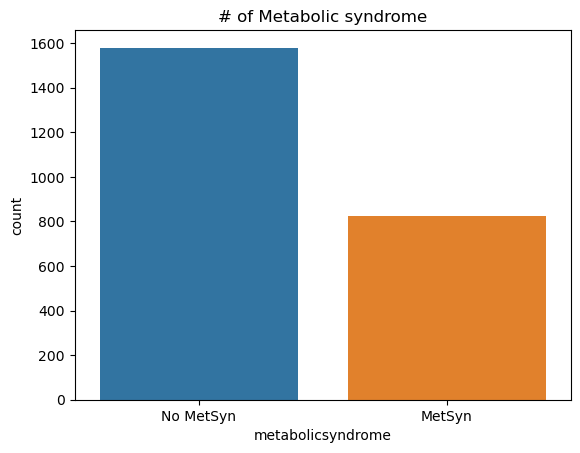

In [19]:
ax = sns.countplot(x=ms['metabolicsyndrome'])
ax.set_title('# of Metabolic syndrome');

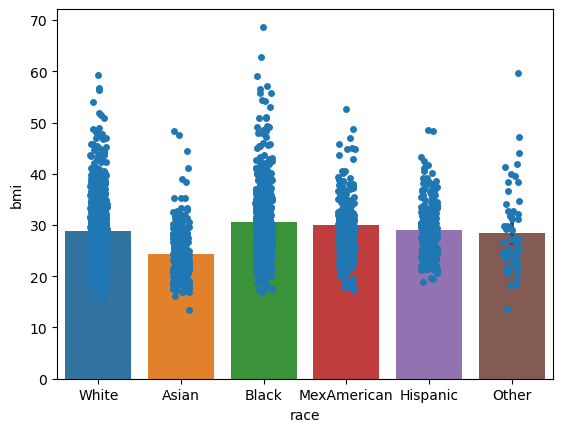

In [20]:
# Stripplot and barplot in one plot
# Barplot for race and bmi
sns.barplot(data=ms, x=ms['race'], y=ms['bmi'])
# Stripplot 
sns.stripplot(data=ms, x=ms['race'], y=ms['bmi']);

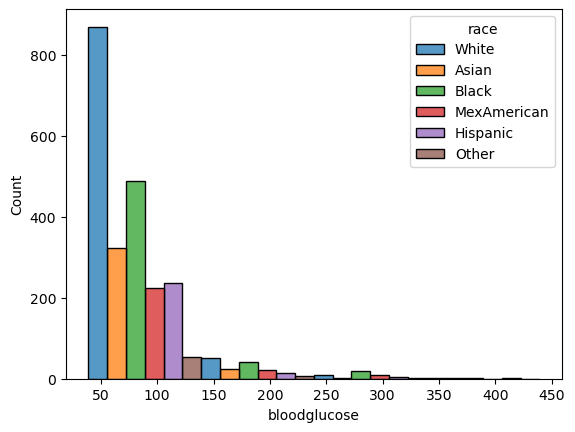

In [21]:
sns.histplot(binwidth=100,
            hue=ms['race'],
            x=ms['bloodglucose'],
            data=ms,
            stat="count",
            multiple="dodge");

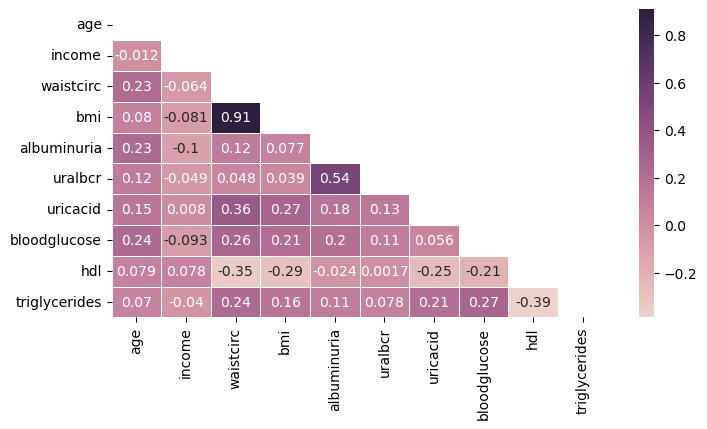

In [55]:
# To get a triangle correlation map and hide duplicate values as well as the diagonal of all the values with themselves, use the mask argument
# We will first define the area to be masked (blocked)
# np.ones_like(corr) creates an array of all 1s of the same shape as the corr dataframe we just made
# np.triu() will just return the upper triangle of any array 
# by masking (blocking) the upper triangle in our heatmap, we are left with only the lower triangle
mask = np.triu(np.ones_like(ms.corr()))
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(ms.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot = True, mask = mask,linewidth=.7);

In [65]:
def plot_numeric(df, y, x, figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  # Make sure the plot is shown before the print statement
  plt.show();

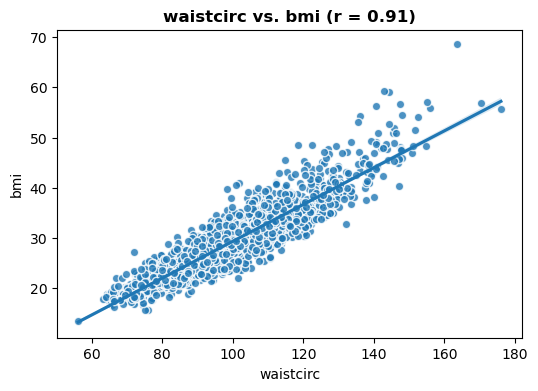

In [66]:
plot_numeric(ms,'bmi', 'waistcirc');

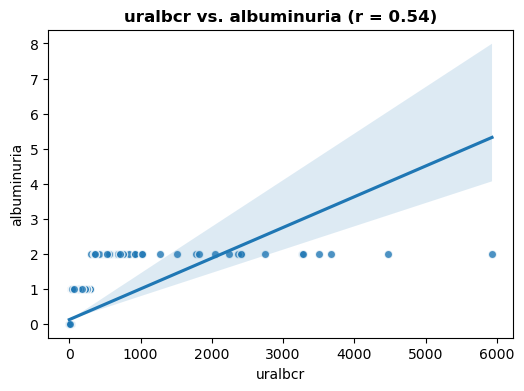

In [69]:
plot_numeric(ms,'albuminuria','uralbcr');

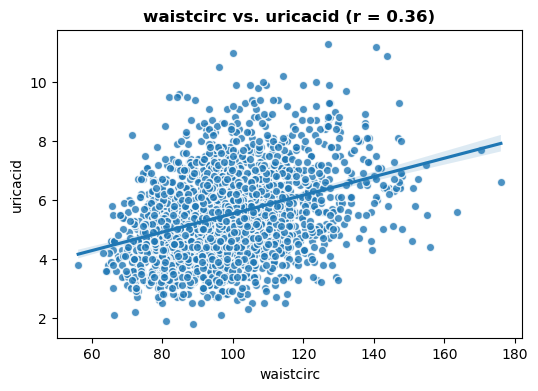

In [76]:
plot_numeric(ms,'uricacid', 'waistcirc');

There is a strong relation between bmi and the waist circumference which is very obvious, so we would not choose this one to recommend for our stakeholders.

Instead, we found there is a strong correlation between uralbcr and albuminuria columns, which indicates that Prostate-specific antigen defined biochemical recurrence of prostate cancer is strong related to the presence of high protein (albumin) is found in urine. We can choose these stats to help our stakeholders to cluster the group as high chance for prostate cancer - one related disease from metabolic syndrome. 

The other one should be the Waist circumference is correlated to the uric acid that found in our blood, so we can choose this correlation to recommend for stakeholders that patient can easily get hyperuricemia a.k.a gout when being overweight.

# Dataset 2 and Machine Learning Model Overview

- Data Source: [California House Price](https://www.kaggle.com/datasets/shibumohapatra/house-price)
- The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional r requirements for it
- The target is to predict median house value of blocks
- One row represents all data of a block of houses 
- This is a regression problem.


In [22]:
ch = pd.read_csv("D:\Lesson\Stack 3\california-housing.csv")
ch.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [23]:
print(f"There is {ch.shape[0]} rows, and {ch.shape[1]} columns in the data")

There is 20640 rows, and 10 columns in the data


In [24]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## Data Cleaning

There is no uneccesary columns need to be deleted

### Delete Duplicated Rows

In [25]:
print(f'The dataset has {ch.duplicated().sum()} duplicated values')

The dataset has 0 duplicated values


### Handling missing values

In [26]:
print(f'the data set has {ms.isna().sum().sum()} missing values')

the data set has 436 missing values


> We will not handle missing value because when we split the data set and train the data we will use onehotencoder and simple imputer to handle these missing values

### Checking inconsistencies and unusual values

In [27]:
ch.describe(include='number')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [28]:
ch.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [29]:
ch['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

***There is no inconsistencies or unsual values among the dataset***

### Identify Outliers

In [30]:
identify_outlier(ch,'total_rooms')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
101,-122.25,37.81,28,5806,1603.0,2563,1497,3.2177,NEAR BAY,273400
104,-122.26,37.81,34,5871,1914.0,2689,1789,2.8406,NEAR BAY,335700
185,-122.23,37.79,43,5963,1344.0,4367,1231,2.1917,NEAR BAY,112800
283,-122.16,37.79,22,12842,2048.0,4985,1967,5.9849,NEAR BAY,371000
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33,6861,1820.0,3717,1767,1.7311,INLAND,182600
20544,-121.76,38.55,23,8800,1857.0,6330,1832,2.0650,INLAND,219400
20563,-121.75,38.67,9,12139,2640.0,6837,2358,3.1250,INLAND,132500
20567,-121.79,38.66,15,6809,1052.0,3060,1060,5.3064,INLAND,165000


In [31]:
identify_outlier(ch,'median_house_value')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
89,-122.27,37.80,52,249,78.0,396,85,1.2434,NEAR BAY,500001
140,-122.18,37.81,30,292,38.0,126,52,6.3624,NEAR BAY,483300
459,-122.25,37.87,52,609,236.0,1349,250,1.1696,NEAR BAY,500001
489,-122.25,37.86,48,2153,517.0,1656,459,3.0417,NEAR BAY,489600
493,-122.24,37.86,52,1668,225.0,517,214,7.8521,NEAR BAY,500001
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35,1503,263.0,576,216,5.1457,<1H OCEAN,500001
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,<1H OCEAN,500001
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,<1H OCEAN,500001
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,<1H OCEAN,500001


## Produce EDA for the target and all features

In [41]:
import matplotlib
from matplotlib.ticker import FuncFormatter
price_fmt_100k = FuncFormatter(hundred_k)
price_fmt = matplotlib.ticker.StrMethodFormatter('${x:,.0f}')


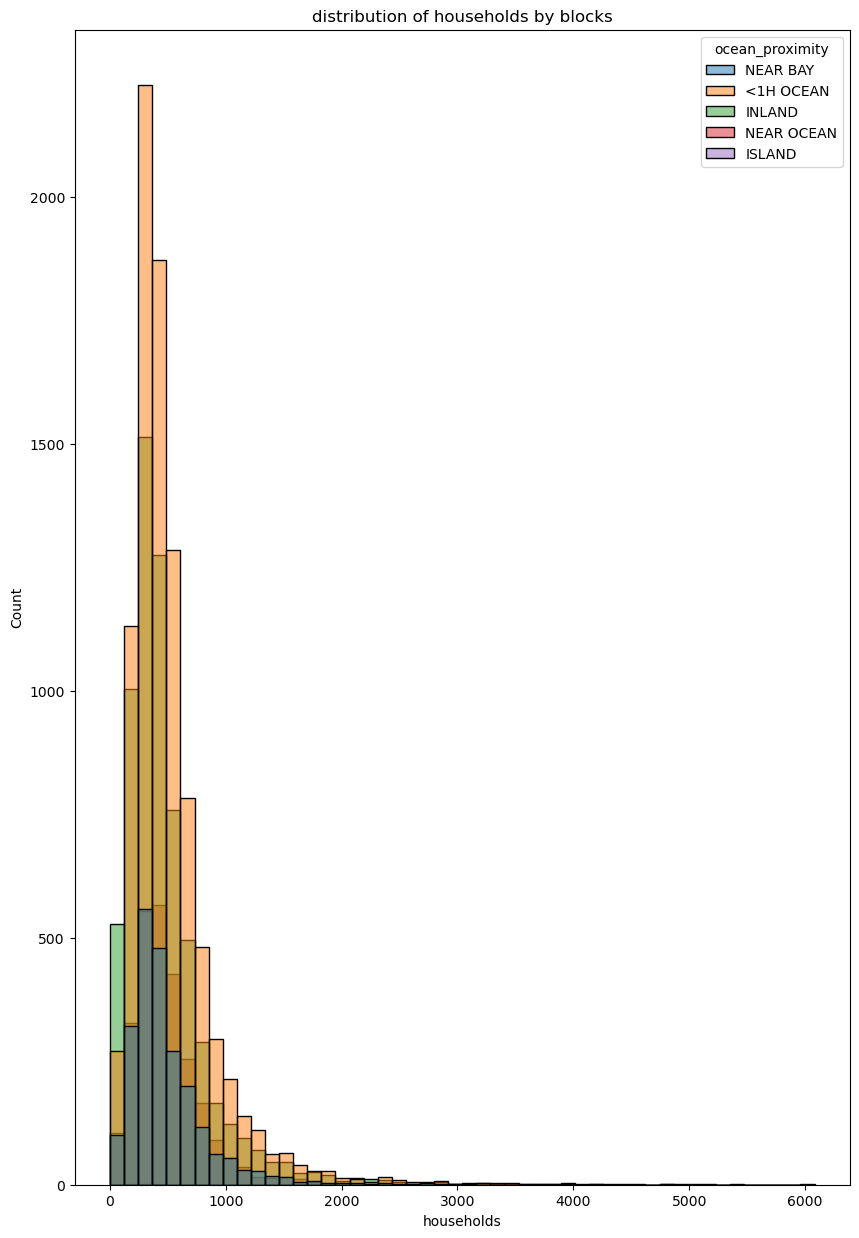

In [91]:
## Get a new fig from plot_dist and use the new FuncFormatter for price
fig, ax = plt.subplots(figsize=[10,15])
sns.histplot(data=ch,x=ch['households'], color='skyblue', bins = 50, hue = 'ocean_proximity')
ax.set_title('distribution of households by blocks');

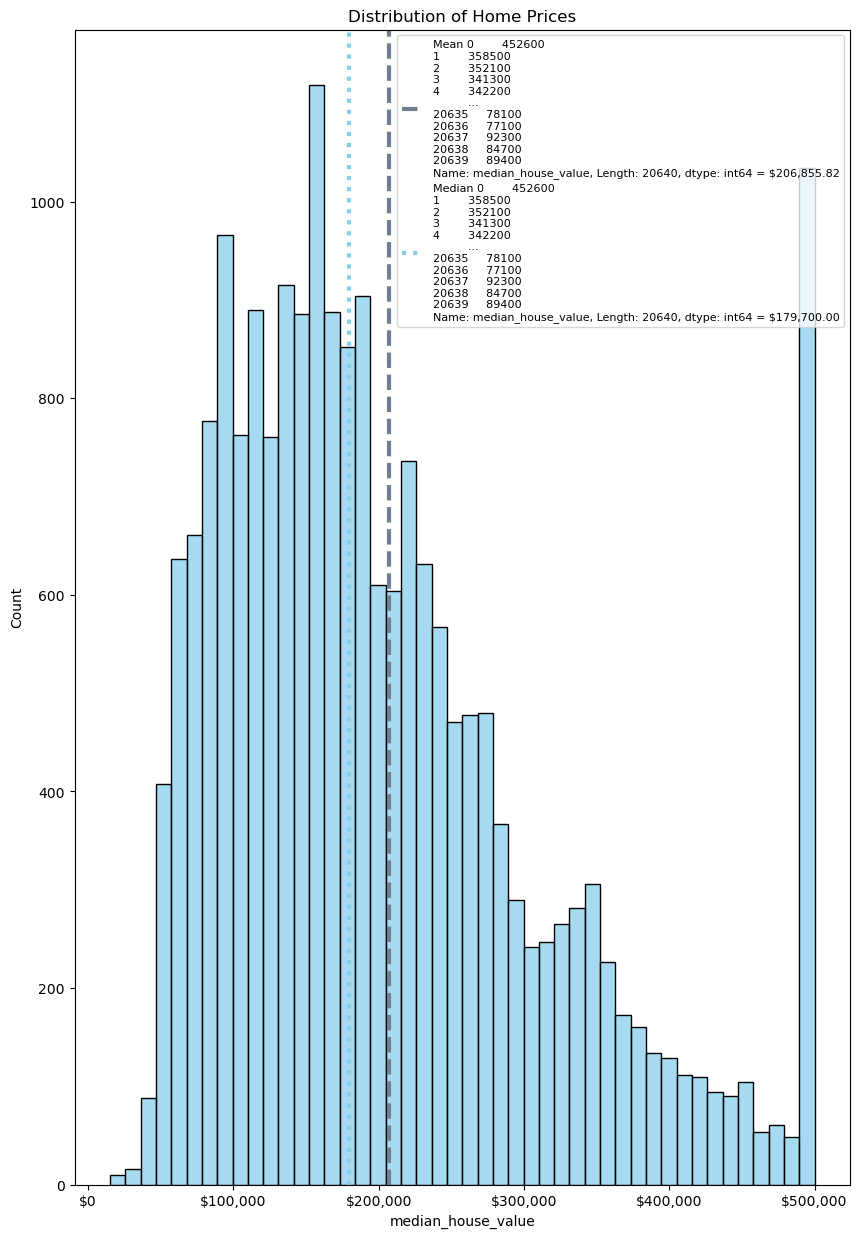

In [42]:
## Get a new fig from plot_dist and use the new FuncFormatter for price
fig, ax = plt.subplots(figsize=[10,15])
    ## Plot histogram
sns.histplot(data=ch,x=ch['median_house_value'], color='skyblue')
ax.set_title('Distribution of Home Prices');
    ## Annotating mean and median
mean_price = ch['median_house_value'].mean()
ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {ch['median_house_value']} = ${mean_price:,.2f}");
med_price = ch['median_house_value'].median()
ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {ch['median_house_value']} = ${med_price:,.2f}");
ax.legend(fontsize = 8);
ax.xaxis.set_major_formatter(price_fmt);

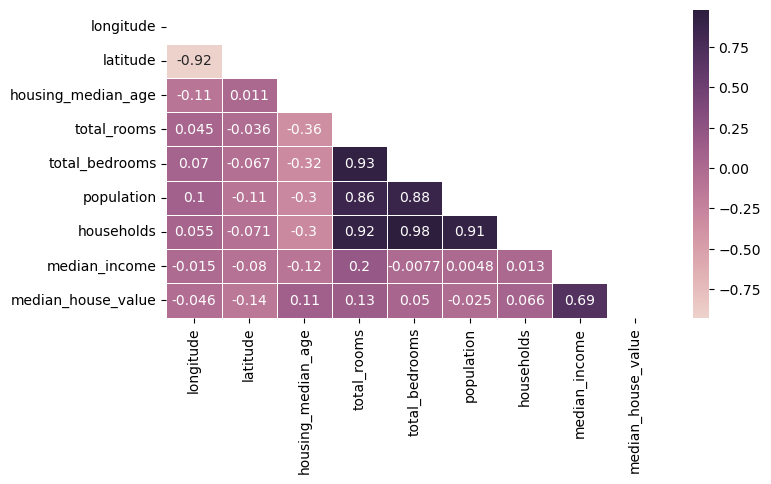

In [70]:
mask = np.triu(np.ones_like(ch.corr()))
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(ch.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot = True, mask = mask,linewidth=.7);

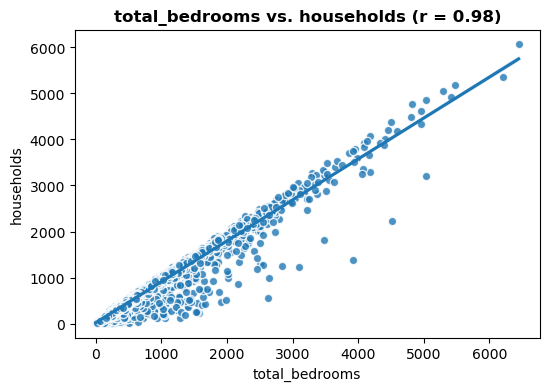

In [78]:
plot_numeric(ch, 'households', 'total_bedrooms');

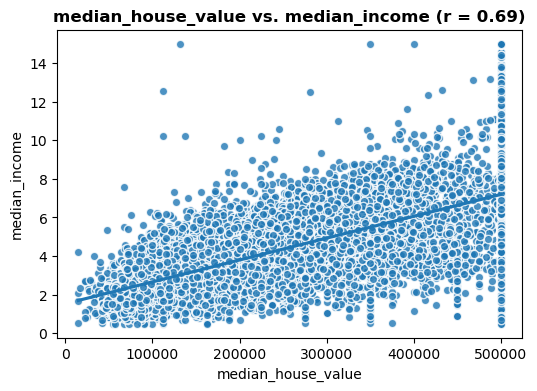

In [75]:
plot_numeric(ch,"median_income", 'median_house_value')

There is some significantly strong correlation between number of rooms or bedrooms versus population and households. So, we should just pick one pair to represents this characteristic of this dataset in this case I choose households and total bedrooms of blocks, so I can recommend for stakeholders to cluster the high amount of household blocks in order to build more rental unit with bigger capacity rather than luxurious models of living space.

The other relations is about the median house value and the median income of house hold, they also have a significant correlation as the more people can afford the price of the house will relatively push the median price of blocks higher, therefore I will recommend stakeholders to consider about prices of their properties either for selling or renting these units. 